In [1]:
import pandas as pd
import tensorflow as tf

# NLP fundamentals

### Tokenization

In [8]:

from tensorflow.keras.preprocessing.text import Tokenizer

# using a list of sentences
sentences = [
             "I drink milk",
             "I don't want to sleep",
             "I do not like milk",
             "You look confused! # :D",
             "I want a cookie...",
             "You are a voyeur."
]

make_tokens = Tokenizer(num_words = 50) # limit word count to not allow words like : rodomontade, voyeurism, ostenation etc.

make_tokens.fit_on_texts(sentences)

word_dict = make_tokens.word_index
# print('dictionary of words', word_dict)
word_dict


dictionary of words {'i': 1, 'milk': 2, 'want': 3, 'you': 4, 'a': 5, 'drink': 6, "don't": 7, 'to': 8, 'sleep': 9, 'do': 10, 'not': 11, 'like': 12, 'look': 13, 'confused': 14, 'd': 15, 'cookie': 16, 'are': 17, 'voyeur': 18}


{'i': 1,
 'milk': 2,
 'want': 3,
 'you': 4,
 'a': 5,
 'drink': 6,
 "don't": 7,
 'to': 8,
 'sleep': 9,
 'do': 10,
 'not': 11,
 'like': 12,
 'look': 13,
 'confused': 14,
 'd': 15,
 'cookie': 16,
 'are': 17,
 'voyeur': 18}

In [9]:
encoded_sentences = make_tokens.texts_to_sequences(sentences)
encoded_sentences

[[1, 6, 2],
 [1, 7, 3, 8, 9],
 [1, 10, 11, 12, 2],
 [4, 13, 14, 15],
 [1, 3, 5, 16],
 [4, 17, 5, 18]]

In [10]:
new_sentences = [
                 'I love climbing',
                 'I do climb',
                 'You look amazed! :D'
]

new_encoded_sentences = make_tokens.texts_to_sequences(new_sentences)
new_encoded_sentences

[[1], [1, 10], [4, 13, 15]]

### Issues :  

##### 1) Broken sentences.
##### 2) DIfferent lengths

### Solutions
##### 1) Need a large pre-prepared dictionary, OR use out of vocabolary *token*

##### 2) Use padding

### Padding

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# using a list of sentences
sentences = [
             "I drink milk",
             "I don't want to sleep",
             "I do not like milk",
             "You look confused! # :D",
             "I want a cookie...",
             "You are a voyeur."
]

make_tokens = Tokenizer(num_words = 50, oov_token= "<OOV>")

make_tokens.fit_on_texts(sentences)
word_dict = make_tokens.word_index

word_dict


{'<OOV>': 1,
 'i': 2,
 'milk': 3,
 'want': 4,
 'you': 5,
 'a': 6,
 'drink': 7,
 "don't": 8,
 'to': 9,
 'sleep': 10,
 'do': 11,
 'not': 12,
 'like': 13,
 'look': 14,
 'confused': 15,
 'd': 16,
 'cookie': 17,
 'are': 18,
 'voyeur': 19}

In [12]:
encoded_sentences = make_tokens.texts_to_sequences(sentences) # 
padded = pad_sequences(encoded_sentences)
print(encoded_sentences)
print(padded)

[[2, 7, 3], [2, 8, 4, 9, 10], [2, 11, 12, 13, 3], [5, 14, 15, 16], [2, 4, 6, 17], [5, 18, 6, 19]]
[[ 0  0  2  7  3]
 [ 2  8  4  9 10]
 [ 2 11 12 13  3]
 [ 0  5 14 15 16]
 [ 0  2  4  6 17]
 [ 0  5 18  6 19]]


In [13]:
new_sentences = [
                 'I love climbing',
                 'I do climb',
                 'You look amazed'
]

new_encoded_sentences = make_tokens.texts_to_sequences(new_sentences)
padded_new = pad_sequences(new_encoded_sentences, padding= 'post', maxlen = 6)
print(new_encoded_sentences)
print(padded_new)
padded_new

[[2, 1, 1], [2, 11, 1], [5, 14, 1]]
[[ 2  1  1  0  0  0]
 [ 2 11  1  0  0  0]
 [ 5 14  1  0  0  0]]


array([[ 2,  1,  1,  0,  0,  0],
       [ 2, 11,  1,  0,  0,  0],
       [ 5, 14,  1,  0,  0,  0]])

In [15]:
new_encoded_sentences = make_tokens.texts_to_sequences(new_sentences)

new_encoded_sentences

[[2, 1, 1], [2, 5, 1], [8, 9, 1]]

### for understanding we will use pre-tokenized dataset

In [14]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 11s 1us/step
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whi

In [15]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [21]:
len(x_train[0])

218

In [24]:
print(y_train[0])

1


In [33]:
word_dict = imdb.get_word_index()
print(word_dict['movie'])

17


In [49]:
print(word_dict)

: 88151, 'gravestones': 88152, 'freshmen': 23366, 'formatted': 34646, 'drooping': 88153, 'zelig': 76033, 'yakusyo': 88154, 'lunceford': 82057, 'editorializing': 88155, 'plywood': 34647, 'banalities': 88156, 'nestor': 30536, 'revitalizes': 64826, 'voguing': 40752, 'sedate': 21666, 'dictum': 51857, 'brasher': 88157, 'york': 779, 'unchallengeable': 88158, 'subtelly': 88159, 'opposition': 8772, 'fetchingly': 88160, "'secrets": 70076, 'appearance\x85': 88161, 'teleflick': 88162, 'viennese': 19481, 'orphanage': 10076, 'movers': 40753, "cameraman's": 27605, "cameraman't": 88163, 'pornoes': 88164, 'embodiments': 51858, 'heorine': 88165, 'fraternity': 16105, "'procedures'": 88166, 'finds': 656, 'caratherisic': 88167, 'munshi': 27606, 'clashing': 20584, "mjh's": 40754, 'lärm': 88168, 'nikah': 76037, 'incandescent': 51859, 'stowing': 51860, 'acrid': 51861, 'eyewitness': 25213, 'maniacally': 24001, 'suspenders': 51863, 'acupat': 57060, 'nominee': 11582, 'toshiro': 23367, "'anita": 51864, 'ciannell

In [38]:
len(x_train[59])

206

In [39]:
x_train = pad_sequences(x_train, padding= 'post', maxlen= 256)
x_test = pad_sequences(x_test, padding= 'post', maxlen= 256)

In [43]:
print(x_train[0:6])

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 [1784   86 1117 ...   21   64 2574]
 [   1  249 1323 ...    0    0    0]
 [   1  778  128 ...    0    0    0]]


## Word Embedding : representing words with vectors

#### Example of word embedding in 5 dimensions
|      |Male|Food|funny|respect|female| 
|------|----|----|-----|-------|------|
|King  | .9 |.04 | .51 |  .95  | .06  |  
|Queen | .1 |.03 | .46 |  .96  | .91  |
|Hen.  | .04|.8. | .1. |  .1   | .94  |
|bad   | .04|.1  | .1  |  .1   | .05  |
|Hello | .04|.05 | .3  |  .8   | .05  |
|prince| .93|.03 | .48 |  .93  | .05  |

#### Words with similar meaing will be close to each other

#### Neural networks can learn these vectors by training: that is it can learn the associated values.

#### NN also assigns abstract categories (dimensions)

In [23]:
vocab_size = 10000
embedding_dim = 16
max_length = 256
trunc_type='post'
oov_tok = "<OOV>"

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 24582     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 184,589
Trainable params: 184,589
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(
    x_train, y_train,
    epochs = 20,
    validation_data = (x_test, y_test), #validation_split = 0.15,
    batch_size = 64   
)

Epoch 1/20
391/391 [==============================] - 5s 10ms/step - loss: 0.6352 - accuracy: 0.5990 - val_loss: 0.3130 - val_accuracy: 0.8695
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.2213 - accuracy: 0.9175 - val_loss: 0.3013 - val_accuracy: 0.8738
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1133 - accuracy: 0.9678 - val_loss: 0.3386 - val_accuracy: 0.8653
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0489 - accuracy: 0.9919 - val_loss: 0.3827 - val_accuracy: 0.8643
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0187 - accuracy: 0.9981 - val_loss: 0.4189 - val_accuracy: 0.8629
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.4630 - val_accuracy: 0.8616
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.4930 - val_accuracy: 0.8626
Epoch

## visualising the word embeddings: OPTIONAL

*   List item
*   List item




Code for visualization:


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]

In [ ]:
reverse_word_dict = dict([(value, key) for (key, value) in word_dict.items()])

def decode_review(text):
    return ' '.join([reverse_word_dict.get(i, '?') for i in text])

decode_review(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_dict[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

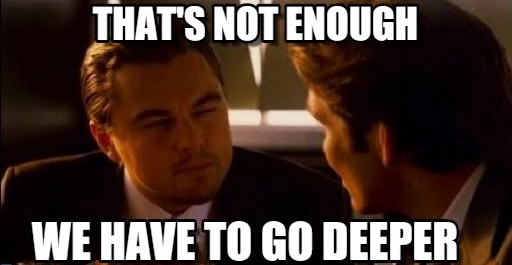

## Why not Dense layer
### The sequence of words is important : 
### SEquencence in every data point is not same

### LSTM: Long Short-Term Memory

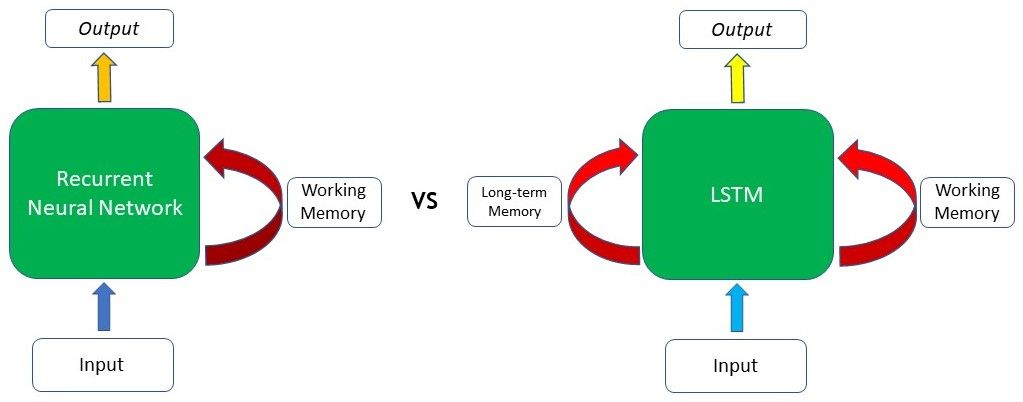



---



#  [  3 , 5, ,7 , 89]

Input  = 3 , out put = g(3)
input = 5 , g(3), output = g(5)
input = 7, g(5), output = 


### I grew up in Germany that why Ithe language I was tought was German

## Unidirectional Reading
### I want a glass of pineapple ...?....   (juice/fruit)
### I want a slice of pineapple ...?....   (pizza/fruit)



## Birectional reading

#### I want to be Donald trump was president of USA.
#### I want to be Donald is my favourite catoon charecter.

In [29]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256, 64)           12544     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 185,089
Trainable params: 185,089
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs = 10,
    validation_data = (x_test, y_test),
    batch_size = 256                   #validation_split = 0.15,
)

Epoch 1/10
 6/98 [>.............................] - ETA: 1:10 - loss: 0.6934 - accuracy: 0.4873

KeyboardInterrupt: ignored